In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [2]:
# load dataset
dataset = pd.read_csv('Seatbelts.csv',index_col=0)
values = dataset.values

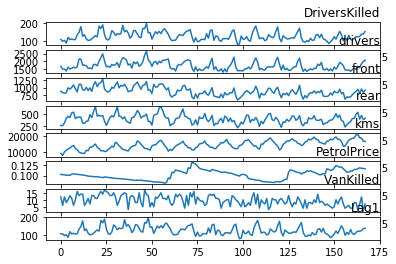

In [3]:
# specify columns to plot
i = 1
# plot each column
pyplot.figure()
for k in range(8):
	pyplot.subplot(8, 1, i)
	pyplot.plot(values[:, k])
	pyplot.title(dataset.columns[k],loc='right')
	i += 1
pyplot.show()

In [4]:
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [5]:
X=scaled[:, 1:]
y=scaled[:, 0]
train = scaled[:134, :]
test = scaled[134:, :]
# split into input and outputs
train_X, train_y = train[:, 1:], train[:, 0]
test_X, test_y = test[:,1:], test[:, 0]

In [7]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((134, 1, 7), (134,), (34, 1, 7), (34,))

In [6]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
X=X.reshape((X.shape[0], 1, X.shape[1]))

In [8]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((134, 1, 7), (134,), (34, 1, 7), (34,))

In [9]:
# design network
model = Sequential()
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               270336    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
__________

In [11]:
# fit network
history_train = model.fit(train_X, train_y, epochs=4000, batch_size=256, verbose=2,validation_split=0.3,shuffle=False)

Train on 93 samples, validate on 41 samples
Epoch 1/4000
 - 3s - loss: 0.2501 - val_loss: 0.1351
Epoch 2/4000
 - 0s - loss: 0.1703 - val_loss: 0.0799
Epoch 3/4000
 - 0s - loss: 0.0998 - val_loss: 0.0421
Epoch 4/4000
 - 0s - loss: 0.0504 - val_loss: 0.0290
Epoch 5/4000
 - 0s - loss: 0.0312 - val_loss: 0.0432
Epoch 6/4000
 - 0s - loss: 0.0462 - val_loss: 0.0616
Epoch 7/4000
 - 0s - loss: 0.0679 - val_loss: 0.0623
Epoch 8/4000
 - 0s - loss: 0.0690 - val_loss: 0.0503
Epoch 9/4000
 - 0s - loss: 0.0547 - val_loss: 0.0365
Epoch 10/4000
 - 0s - loss: 0.0386 - val_loss: 0.0278
Epoch 11/4000
 - 0s - loss: 0.0287 - val_loss: 0.0255
Epoch 12/4000
 - 0s - loss: 0.0265 - val_loss: 0.0275
Epoch 13/4000
 - 0s - loss: 0.0295 - val_loss: 0.0311
Epoch 14/4000
 - 0s - loss: 0.0341 - val_loss: 0.0340
Epoch 15/4000
 - 0s - loss: 0.0377 - val_loss: 0.0349
Epoch 16/4000
 - 0s - loss: 0.0387 - val_loss: 0.0338
Epoch 17/4000
 - 0s - loss: 0.0371 - val_loss: 0.0310
Epoch 18/4000
 - 0s - loss: 0.0334 - val_loss: 

Epoch 152/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 153/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 154/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 155/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 156/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 157/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 158/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 159/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 160/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 161/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 162/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 163/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 164/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 165/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 166/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 167/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 168/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 169/4000
 - 0s - loss: 0.0095 - val_loss: 0.0081
Epoch 170/

Epoch 301/4000
 - 0s - loss: 0.0088 - val_loss: 0.0080
Epoch 302/4000
 - 0s - loss: 0.0088 - val_loss: 0.0080
Epoch 303/4000
 - 0s - loss: 0.0088 - val_loss: 0.0080
Epoch 304/4000
 - 0s - loss: 0.0088 - val_loss: 0.0080
Epoch 305/4000
 - 0s - loss: 0.0087 - val_loss: 0.0080
Epoch 306/4000
 - 0s - loss: 0.0087 - val_loss: 0.0080
Epoch 307/4000
 - 0s - loss: 0.0087 - val_loss: 0.0080
Epoch 308/4000
 - 0s - loss: 0.0087 - val_loss: 0.0080
Epoch 309/4000
 - 0s - loss: 0.0087 - val_loss: 0.0080
Epoch 310/4000
 - 0s - loss: 0.0087 - val_loss: 0.0080
Epoch 311/4000
 - 0s - loss: 0.0087 - val_loss: 0.0080
Epoch 312/4000
 - 0s - loss: 0.0086 - val_loss: 0.0080
Epoch 313/4000
 - 0s - loss: 0.0086 - val_loss: 0.0080
Epoch 314/4000
 - 0s - loss: 0.0086 - val_loss: 0.0080
Epoch 315/4000
 - 0s - loss: 0.0086 - val_loss: 0.0080
Epoch 316/4000
 - 0s - loss: 0.0086 - val_loss: 0.0080
Epoch 317/4000
 - 0s - loss: 0.0086 - val_loss: 0.0080
Epoch 318/4000
 - 0s - loss: 0.0086 - val_loss: 0.0080
Epoch 319/

Epoch 450/4000
 - 0s - loss: 0.0072 - val_loss: 0.0090
Epoch 451/4000
 - 0s - loss: 0.0072 - val_loss: 0.0091
Epoch 452/4000
 - 0s - loss: 0.0071 - val_loss: 0.0091
Epoch 453/4000
 - 0s - loss: 0.0071 - val_loss: 0.0090
Epoch 454/4000
 - 0s - loss: 0.0071 - val_loss: 0.0092
Epoch 455/4000
 - 0s - loss: 0.0071 - val_loss: 0.0089
Epoch 456/4000
 - 0s - loss: 0.0072 - val_loss: 0.0093
Epoch 457/4000
 - 0s - loss: 0.0072 - val_loss: 0.0089
Epoch 458/4000
 - 0s - loss: 0.0072 - val_loss: 0.0094
Epoch 459/4000
 - 0s - loss: 0.0072 - val_loss: 0.0089
Epoch 460/4000
 - 0s - loss: 0.0072 - val_loss: 0.0094
Epoch 461/4000
 - 0s - loss: 0.0072 - val_loss: 0.0089
Epoch 462/4000
 - 0s - loss: 0.0072 - val_loss: 0.0095
Epoch 463/4000
 - 0s - loss: 0.0072 - val_loss: 0.0089
Epoch 464/4000
 - 0s - loss: 0.0072 - val_loss: 0.0095
Epoch 465/4000
 - 0s - loss: 0.0072 - val_loss: 0.0089
Epoch 466/4000
 - 0s - loss: 0.0072 - val_loss: 0.0095
Epoch 467/4000
 - 0s - loss: 0.0072 - val_loss: 0.0089
Epoch 468/

Epoch 599/4000
 - 0s - loss: 0.0069 - val_loss: 0.0094
Epoch 600/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 601/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 602/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 603/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 604/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 605/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 606/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 607/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 608/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 609/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 610/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 611/4000
 - 0s - loss: 0.0069 - val_loss: 0.0095
Epoch 612/4000
 - 0s - loss: 0.0069 - val_loss: 0.0096
Epoch 613/4000
 - 0s - loss: 0.0069 - val_loss: 0.0094
Epoch 614/4000
 - 0s - loss: 0.0069 - val_loss: 0.0096
Epoch 615/4000
 - 0s - loss: 0.0069 - val_loss: 0.0094
Epoch 616/4000
 - 0s - loss: 0.0069 - val_loss: 0.0098
Epoch 617/

Epoch 748/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 749/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 750/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 751/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 752/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 753/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 754/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 755/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 756/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 757/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 758/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 759/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 760/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 761/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 762/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 763/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 764/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 765/4000
 - 0s - loss: 0.0068 - val_loss: 0.0098
Epoch 766/

Epoch 897/4000
 - 0s - loss: 0.0067 - val_loss: 0.0100
Epoch 898/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 899/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 900/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 901/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 902/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 903/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 904/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 905/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 906/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 907/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 908/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 909/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 910/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 911/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 912/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 913/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 914/4000
 - 0s - loss: 0.0067 - val_loss: 0.0101
Epoch 915/

Epoch 1046/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1047/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1048/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1049/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1050/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1051/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1052/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1053/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1054/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1055/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1056/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1057/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1058/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1059/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1060/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1061/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1062/4000
 - 0s - loss: 0.0066 - val_loss: 0.0104
Epoch 1063/4000
 - 0s - loss: 0.0066 - val_loss:

Epoch 1193/4000
 - 0s - loss: 0.0066 - val_loss: 0.0108
Epoch 1194/4000
 - 0s - loss: 0.0066 - val_loss: 0.0108
Epoch 1195/4000
 - 0s - loss: 0.0066 - val_loss: 0.0108
Epoch 1196/4000
 - 0s - loss: 0.0066 - val_loss: 0.0108
Epoch 1197/4000
 - 0s - loss: 0.0066 - val_loss: 0.0108
Epoch 1198/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1199/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1200/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1201/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1202/4000
 - 0s - loss: 0.0065 - val_loss: 0.0109
Epoch 1203/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1204/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1205/4000
 - 0s - loss: 0.0065 - val_loss: 0.0109
Epoch 1206/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1207/4000
 - 0s - loss: 0.0065 - val_loss: 0.0109
Epoch 1208/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1209/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1210/4000
 - 0s - loss: 0.0065 - val_loss:

Epoch 1340/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1341/4000
 - 0s - loss: 0.0065 - val_loss: 0.0110
Epoch 1342/4000
 - 0s - loss: 0.0065 - val_loss: 0.0111
Epoch 1343/4000
 - 0s - loss: 0.0065 - val_loss: 0.0109
Epoch 1344/4000
 - 0s - loss: 0.0065 - val_loss: 0.0111
Epoch 1345/4000
 - 0s - loss: 0.0065 - val_loss: 0.0111
Epoch 1346/4000
 - 0s - loss: 0.0065 - val_loss: 0.0110
Epoch 1347/4000
 - 0s - loss: 0.0065 - val_loss: 0.0112
Epoch 1348/4000
 - 0s - loss: 0.0065 - val_loss: 0.0111
Epoch 1349/4000
 - 0s - loss: 0.0065 - val_loss: 0.0111
Epoch 1350/4000
 - 0s - loss: 0.0065 - val_loss: 0.0113
Epoch 1351/4000
 - 0s - loss: 0.0065 - val_loss: 0.0111
Epoch 1352/4000
 - 0s - loss: 0.0065 - val_loss: 0.0112
Epoch 1353/4000
 - 0s - loss: 0.0065 - val_loss: 0.0113
Epoch 1354/4000
 - 0s - loss: 0.0065 - val_loss: 0.0111
Epoch 1355/4000
 - 0s - loss: 0.0065 - val_loss: 0.0113
Epoch 1356/4000
 - 0s - loss: 0.0065 - val_loss: 0.0112
Epoch 1357/4000
 - 0s - loss: 0.0065 - val_loss:

Epoch 1487/4000
 - 0s - loss: 0.0064 - val_loss: 0.0120
Epoch 1488/4000
 - 0s - loss: 0.0064 - val_loss: 0.0113
Epoch 1489/4000
 - 0s - loss: 0.0064 - val_loss: 0.0125
Epoch 1490/4000
 - 0s - loss: 0.0065 - val_loss: 0.0108
Epoch 1491/4000
 - 0s - loss: 0.0067 - val_loss: 0.0139
Epoch 1492/4000
 - 0s - loss: 0.0071 - val_loss: 0.0104
Epoch 1493/4000
 - 0s - loss: 0.0078 - val_loss: 0.0173
Epoch 1494/4000
 - 0s - loss: 0.0093 - val_loss: 0.0107
Epoch 1495/4000
 - 0s - loss: 0.0104 - val_loss: 0.0185
Epoch 1496/4000
 - 0s - loss: 0.0104 - val_loss: 0.0102
Epoch 1497/4000
 - 0s - loss: 0.0074 - val_loss: 0.0105
Epoch 1498/4000
 - 0s - loss: 0.0067 - val_loss: 0.0154
Epoch 1499/4000
 - 0s - loss: 0.0084 - val_loss: 0.0100
Epoch 1500/4000
 - 0s - loss: 0.0072 - val_loss: 0.0103
Epoch 1501/4000
 - 0s - loss: 0.0067 - val_loss: 0.0140
Epoch 1502/4000
 - 0s - loss: 0.0077 - val_loss: 0.0103
Epoch 1503/4000
 - 0s - loss: 0.0066 - val_loss: 0.0098
Epoch 1504/4000
 - 0s - loss: 0.0070 - val_loss:

Epoch 1634/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1635/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1636/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1637/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1638/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1639/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1640/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1641/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1642/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1643/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1644/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1645/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1646/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1647/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1648/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1649/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1650/4000
 - 0s - loss: 0.0063 - val_loss: 0.0120
Epoch 1651/4000
 - 0s - loss: 0.0063 - val_loss:

Epoch 1781/4000
 - 0s - loss: 0.0064 - val_loss: 0.0103
Epoch 1782/4000
 - 0s - loss: 0.0064 - val_loss: 0.0108
Epoch 1783/4000
 - 0s - loss: 0.0063 - val_loss: 0.0115
Epoch 1784/4000
 - 0s - loss: 0.0064 - val_loss: 0.0107
Epoch 1785/4000
 - 0s - loss: 0.0063 - val_loss: 0.0106
Epoch 1786/4000
 - 0s - loss: 0.0063 - val_loss: 0.0116
Epoch 1787/4000
 - 0s - loss: 0.0063 - val_loss: 0.0112
Epoch 1788/4000
 - 0s - loss: 0.0063 - val_loss: 0.0107
Epoch 1789/4000
 - 0s - loss: 0.0063 - val_loss: 0.0116
Epoch 1790/4000
 - 0s - loss: 0.0063 - val_loss: 0.0116
Epoch 1791/4000
 - 0s - loss: 0.0063 - val_loss: 0.0110
Epoch 1792/4000
 - 0s - loss: 0.0063 - val_loss: 0.0115
Epoch 1793/4000
 - 0s - loss: 0.0063 - val_loss: 0.0119
Epoch 1794/4000
 - 0s - loss: 0.0063 - val_loss: 0.0113
Epoch 1795/4000
 - 0s - loss: 0.0063 - val_loss: 0.0116
Epoch 1796/4000
 - 0s - loss: 0.0062 - val_loss: 0.0121
Epoch 1797/4000
 - 0s - loss: 0.0063 - val_loss: 0.0115
Epoch 1798/4000
 - 0s - loss: 0.0063 - val_loss:

Epoch 1928/4000
 - 0s - loss: 0.0061 - val_loss: 0.0128
Epoch 1929/4000
 - 0s - loss: 0.0061 - val_loss: 0.0128
Epoch 1930/4000
 - 0s - loss: 0.0061 - val_loss: 0.0128
Epoch 1931/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1932/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1933/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1934/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1935/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1936/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1937/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1938/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1939/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1940/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1941/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1942/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1943/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1944/4000
 - 0s - loss: 0.0061 - val_loss: 0.0129
Epoch 1945/4000
 - 0s - loss: 0.0061 - val_loss:

Epoch 2075/4000
 - 0s - loss: 0.0060 - val_loss: 0.0133
Epoch 2076/4000
 - 0s - loss: 0.0060 - val_loss: 0.0131
Epoch 2077/4000
 - 0s - loss: 0.0060 - val_loss: 0.0134
Epoch 2078/4000
 - 0s - loss: 0.0060 - val_loss: 0.0133
Epoch 2079/4000
 - 0s - loss: 0.0060 - val_loss: 0.0132
Epoch 2080/4000
 - 0s - loss: 0.0060 - val_loss: 0.0134
Epoch 2081/4000
 - 0s - loss: 0.0060 - val_loss: 0.0133
Epoch 2082/4000
 - 0s - loss: 0.0060 - val_loss: 0.0132
Epoch 2083/4000
 - 0s - loss: 0.0060 - val_loss: 0.0134
Epoch 2084/4000
 - 0s - loss: 0.0060 - val_loss: 0.0133
Epoch 2085/4000
 - 0s - loss: 0.0060 - val_loss: 0.0133
Epoch 2086/4000
 - 0s - loss: 0.0060 - val_loss: 0.0134
Epoch 2087/4000
 - 0s - loss: 0.0060 - val_loss: 0.0133
Epoch 2088/4000
 - 0s - loss: 0.0060 - val_loss: 0.0133
Epoch 2089/4000
 - 0s - loss: 0.0060 - val_loss: 0.0134
Epoch 2090/4000
 - 0s - loss: 0.0060 - val_loss: 0.0133
Epoch 2091/4000
 - 0s - loss: 0.0060 - val_loss: 0.0134
Epoch 2092/4000
 - 0s - loss: 0.0060 - val_loss:

Epoch 2222/4000
 - 0s - loss: 0.0059 - val_loss: 0.0142
Epoch 2223/4000
 - 0s - loss: 0.0059 - val_loss: 0.0142
Epoch 2224/4000
 - 0s - loss: 0.0059 - val_loss: 0.0142
Epoch 2225/4000
 - 0s - loss: 0.0059 - val_loss: 0.0142
Epoch 2226/4000
 - 0s - loss: 0.0059 - val_loss: 0.0142
Epoch 2227/4000
 - 0s - loss: 0.0059 - val_loss: 0.0142
Epoch 2228/4000
 - 0s - loss: 0.0059 - val_loss: 0.0142
Epoch 2229/4000
 - 0s - loss: 0.0059 - val_loss: 0.0142
Epoch 2230/4000
 - 0s - loss: 0.0059 - val_loss: 0.0143
Epoch 2231/4000
 - 0s - loss: 0.0059 - val_loss: 0.0143
Epoch 2232/4000
 - 0s - loss: 0.0059 - val_loss: 0.0143
Epoch 2233/4000
 - 0s - loss: 0.0059 - val_loss: 0.0143
Epoch 2234/4000
 - 0s - loss: 0.0059 - val_loss: 0.0143
Epoch 2235/4000
 - 0s - loss: 0.0059 - val_loss: 0.0143
Epoch 2236/4000
 - 0s - loss: 0.0059 - val_loss: 0.0143
Epoch 2237/4000
 - 0s - loss: 0.0059 - val_loss: 0.0143
Epoch 2238/4000
 - 0s - loss: 0.0059 - val_loss: 0.0143
Epoch 2239/4000
 - 0s - loss: 0.0059 - val_loss:

Epoch 2369/4000
 - 0s - loss: 0.0059 - val_loss: 0.0146
Epoch 2370/4000
 - 0s - loss: 0.0059 - val_loss: 0.0146
Epoch 2371/4000
 - 0s - loss: 0.0059 - val_loss: 0.0146
Epoch 2372/4000
 - 0s - loss: 0.0059 - val_loss: 0.0146
Epoch 2373/4000
 - 0s - loss: 0.0059 - val_loss: 0.0146
Epoch 2374/4000
 - 0s - loss: 0.0059 - val_loss: 0.0147
Epoch 2375/4000
 - 0s - loss: 0.0058 - val_loss: 0.0146
Epoch 2376/4000
 - 0s - loss: 0.0058 - val_loss: 0.0146
Epoch 2377/4000
 - 0s - loss: 0.0058 - val_loss: 0.0147
Epoch 2378/4000
 - 0s - loss: 0.0058 - val_loss: 0.0147
Epoch 2379/4000
 - 0s - loss: 0.0058 - val_loss: 0.0146
Epoch 2380/4000
 - 0s - loss: 0.0058 - val_loss: 0.0147
Epoch 2381/4000
 - 0s - loss: 0.0058 - val_loss: 0.0147
Epoch 2382/4000
 - 0s - loss: 0.0058 - val_loss: 0.0147
Epoch 2383/4000
 - 0s - loss: 0.0058 - val_loss: 0.0147
Epoch 2384/4000
 - 0s - loss: 0.0058 - val_loss: 0.0147
Epoch 2385/4000
 - 0s - loss: 0.0058 - val_loss: 0.0147
Epoch 2386/4000
 - 0s - loss: 0.0058 - val_loss:

Epoch 2516/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2517/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2518/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2519/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2520/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2521/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2522/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2523/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2524/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2525/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2526/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2527/4000
 - 0s - loss: 0.0058 - val_loss: 0.0158
Epoch 2528/4000
 - 0s - loss: 0.0058 - val_loss: 0.0159
Epoch 2529/4000
 - 0s - loss: 0.0058 - val_loss: 0.0159
Epoch 2530/4000
 - 0s - loss: 0.0058 - val_loss: 0.0159
Epoch 2531/4000
 - 0s - loss: 0.0058 - val_loss: 0.0159
Epoch 2532/4000
 - 0s - loss: 0.0058 - val_loss: 0.0159
Epoch 2533/4000
 - 0s - loss: 0.0058 - val_loss:

Epoch 2663/4000
 - 0s - loss: 0.0057 - val_loss: 0.0161
Epoch 2664/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2665/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2666/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2667/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2668/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2669/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2670/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2671/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2672/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2673/4000
 - 0s - loss: 0.0057 - val_loss: 0.0162
Epoch 2674/4000
 - 0s - loss: 0.0057 - val_loss: 0.0163
Epoch 2675/4000
 - 0s - loss: 0.0057 - val_loss: 0.0163
Epoch 2676/4000
 - 0s - loss: 0.0057 - val_loss: 0.0163
Epoch 2677/4000
 - 0s - loss: 0.0057 - val_loss: 0.0163
Epoch 2678/4000
 - 0s - loss: 0.0057 - val_loss: 0.0163
Epoch 2679/4000
 - 0s - loss: 0.0057 - val_loss: 0.0163
Epoch 2680/4000
 - 0s - loss: 0.0057 - val_loss:

Epoch 2810/4000
 - 0s - loss: 0.0059 - val_loss: 0.0119
Epoch 2811/4000
 - 0s - loss: 0.0081 - val_loss: 0.0195
Epoch 2812/4000
 - 0s - loss: 0.0068 - val_loss: 0.0174
Epoch 2813/4000
 - 0s - loss: 0.0062 - val_loss: 0.0118
Epoch 2814/4000
 - 0s - loss: 0.0074 - val_loss: 0.0152
Epoch 2815/4000
 - 0s - loss: 0.0058 - val_loss: 0.0184
Epoch 2816/4000
 - 0s - loss: 0.0068 - val_loss: 0.0128
Epoch 2817/4000
 - 0s - loss: 0.0061 - val_loss: 0.0122
Epoch 2818/4000
 - 0s - loss: 0.0063 - val_loss: 0.0165
Epoch 2819/4000
 - 0s - loss: 0.0063 - val_loss: 0.0155
Epoch 2820/4000
 - 0s - loss: 0.0060 - val_loss: 0.0120
Epoch 2821/4000
 - 0s - loss: 0.0064 - val_loss: 0.0131
Epoch 2822/4000
 - 0s - loss: 0.0059 - val_loss: 0.0161
Epoch 2823/4000
 - 0s - loss: 0.0063 - val_loss: 0.0137
Epoch 2824/4000
 - 0s - loss: 0.0058 - val_loss: 0.0119
Epoch 2825/4000
 - 0s - loss: 0.0062 - val_loss: 0.0138
Epoch 2826/4000
 - 0s - loss: 0.0058 - val_loss: 0.0152
Epoch 2827/4000
 - 0s - loss: 0.0061 - val_loss:

Epoch 2957/4000
 - 0s - loss: 0.0056 - val_loss: 0.0176
Epoch 2958/4000
 - 0s - loss: 0.0056 - val_loss: 0.0176
Epoch 2959/4000
 - 0s - loss: 0.0056 - val_loss: 0.0176
Epoch 2960/4000
 - 0s - loss: 0.0056 - val_loss: 0.0176
Epoch 2961/4000
 - 0s - loss: 0.0056 - val_loss: 0.0176
Epoch 2962/4000
 - 0s - loss: 0.0056 - val_loss: 0.0176
Epoch 2963/4000
 - 0s - loss: 0.0056 - val_loss: 0.0176
Epoch 2964/4000
 - 0s - loss: 0.0056 - val_loss: 0.0176
Epoch 2965/4000
 - 0s - loss: 0.0056 - val_loss: 0.0177
Epoch 2966/4000
 - 0s - loss: 0.0056 - val_loss: 0.0177
Epoch 2967/4000
 - 0s - loss: 0.0056 - val_loss: 0.0177
Epoch 2968/4000
 - 0s - loss: 0.0056 - val_loss: 0.0177
Epoch 2969/4000
 - 0s - loss: 0.0056 - val_loss: 0.0177
Epoch 2970/4000
 - 0s - loss: 0.0056 - val_loss: 0.0177
Epoch 2971/4000
 - 0s - loss: 0.0056 - val_loss: 0.0177
Epoch 2972/4000
 - 0s - loss: 0.0056 - val_loss: 0.0177
Epoch 2973/4000
 - 0s - loss: 0.0056 - val_loss: 0.0177
Epoch 2974/4000
 - 0s - loss: 0.0056 - val_loss:

Epoch 3104/4000
 - 0s - loss: 0.0057 - val_loss: 0.0152
Epoch 3105/4000
 - 0s - loss: 0.0059 - val_loss: 0.0136
Epoch 3106/4000
 - 0s - loss: 0.0057 - val_loss: 0.0131
Epoch 3107/4000
 - 0s - loss: 0.0058 - val_loss: 0.0146
Epoch 3108/4000
 - 0s - loss: 0.0057 - val_loss: 0.0153
Epoch 3109/4000
 - 0s - loss: 0.0058 - val_loss: 0.0139
Epoch 3110/4000
 - 0s - loss: 0.0057 - val_loss: 0.0138
Epoch 3111/4000
 - 0s - loss: 0.0057 - val_loss: 0.0155
Epoch 3112/4000
 - 0s - loss: 0.0057 - val_loss: 0.0155
Epoch 3113/4000
 - 0s - loss: 0.0057 - val_loss: 0.0143
Epoch 3114/4000
 - 0s - loss: 0.0057 - val_loss: 0.0149
Epoch 3115/4000
 - 0s - loss: 0.0056 - val_loss: 0.0162
Epoch 3116/4000
 - 0s - loss: 0.0057 - val_loss: 0.0156
Epoch 3117/4000
 - 0s - loss: 0.0056 - val_loss: 0.0148
Epoch 3118/4000
 - 0s - loss: 0.0057 - val_loss: 0.0159
Epoch 3119/4000
 - 0s - loss: 0.0056 - val_loss: 0.0165
Epoch 3120/4000
 - 0s - loss: 0.0056 - val_loss: 0.0155
Epoch 3121/4000
 - 0s - loss: 0.0056 - val_loss:

Epoch 3251/4000
 - 0s - loss: 0.0055 - val_loss: 0.0189
Epoch 3252/4000
 - 0s - loss: 0.0055 - val_loss: 0.0189
Epoch 3253/4000
 - 0s - loss: 0.0055 - val_loss: 0.0189
Epoch 3254/4000
 - 0s - loss: 0.0055 - val_loss: 0.0189
Epoch 3255/4000
 - 0s - loss: 0.0055 - val_loss: 0.0189
Epoch 3256/4000
 - 0s - loss: 0.0055 - val_loss: 0.0189
Epoch 3257/4000
 - 0s - loss: 0.0055 - val_loss: 0.0189
Epoch 3258/4000
 - 0s - loss: 0.0055 - val_loss: 0.0189
Epoch 3259/4000
 - 0s - loss: 0.0055 - val_loss: 0.0189
Epoch 3260/4000
 - 0s - loss: 0.0055 - val_loss: 0.0190
Epoch 3261/4000
 - 0s - loss: 0.0055 - val_loss: 0.0190
Epoch 3262/4000
 - 0s - loss: 0.0055 - val_loss: 0.0190
Epoch 3263/4000
 - 0s - loss: 0.0055 - val_loss: 0.0190
Epoch 3264/4000
 - 0s - loss: 0.0055 - val_loss: 0.0190
Epoch 3265/4000
 - 0s - loss: 0.0055 - val_loss: 0.0190
Epoch 3266/4000
 - 0s - loss: 0.0055 - val_loss: 0.0190
Epoch 3267/4000
 - 0s - loss: 0.0055 - val_loss: 0.0190
Epoch 3268/4000
 - 0s - loss: 0.0055 - val_loss:

Epoch 3398/4000
 - 0s - loss: 0.0057 - val_loss: 0.0159
Epoch 3399/4000
 - 0s - loss: 0.0056 - val_loss: 0.0149
Epoch 3400/4000
 - 0s - loss: 0.0056 - val_loss: 0.0156
Epoch 3401/4000
 - 0s - loss: 0.0056 - val_loss: 0.0169
Epoch 3402/4000
 - 0s - loss: 0.0056 - val_loss: 0.0162
Epoch 3403/4000
 - 0s - loss: 0.0055 - val_loss: 0.0154
Epoch 3404/4000
 - 0s - loss: 0.0056 - val_loss: 0.0164
Epoch 3405/4000
 - 0s - loss: 0.0055 - val_loss: 0.0172
Epoch 3406/4000
 - 0s - loss: 0.0056 - val_loss: 0.0163
Epoch 3407/4000
 - 0s - loss: 0.0055 - val_loss: 0.0161
Epoch 3408/4000
 - 0s - loss: 0.0055 - val_loss: 0.0172
Epoch 3409/4000
 - 0s - loss: 0.0055 - val_loss: 0.0173
Epoch 3410/4000
 - 0s - loss: 0.0055 - val_loss: 0.0165
Epoch 3411/4000
 - 0s - loss: 0.0055 - val_loss: 0.0169
Epoch 3412/4000
 - 0s - loss: 0.0055 - val_loss: 0.0178
Epoch 3413/4000
 - 0s - loss: 0.0055 - val_loss: 0.0173
Epoch 3414/4000
 - 0s - loss: 0.0055 - val_loss: 0.0170
Epoch 3415/4000
 - 0s - loss: 0.0055 - val_loss:

Epoch 3545/4000
 - 0s - loss: 0.0054 - val_loss: 0.0202
Epoch 3546/4000
 - 0s - loss: 0.0054 - val_loss: 0.0202
Epoch 3547/4000
 - 0s - loss: 0.0054 - val_loss: 0.0202
Epoch 3548/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3549/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3550/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3551/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3552/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3553/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3554/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3555/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3556/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3557/4000
 - 0s - loss: 0.0054 - val_loss: 0.0203
Epoch 3558/4000
 - 0s - loss: 0.0054 - val_loss: 0.0204
Epoch 3559/4000
 - 0s - loss: 0.0054 - val_loss: 0.0204
Epoch 3560/4000
 - 0s - loss: 0.0054 - val_loss: 0.0204
Epoch 3561/4000
 - 0s - loss: 0.0054 - val_loss: 0.0204
Epoch 3562/4000
 - 0s - loss: 0.0054 - val_loss:

Epoch 3692/4000
 - 0s - loss: 0.0055 - val_loss: 0.0177
Epoch 3693/4000
 - 0s - loss: 0.0054 - val_loss: 0.0182
Epoch 3694/4000
 - 0s - loss: 0.0055 - val_loss: 0.0170
Epoch 3695/4000
 - 0s - loss: 0.0054 - val_loss: 0.0171
Epoch 3696/4000
 - 0s - loss: 0.0054 - val_loss: 0.0185
Epoch 3697/4000
 - 0s - loss: 0.0054 - val_loss: 0.0182
Epoch 3698/4000
 - 0s - loss: 0.0054 - val_loss: 0.0173
Epoch 3699/4000
 - 0s - loss: 0.0054 - val_loss: 0.0182
Epoch 3700/4000
 - 0s - loss: 0.0054 - val_loss: 0.0190
Epoch 3701/4000
 - 0s - loss: 0.0054 - val_loss: 0.0181
Epoch 3702/4000
 - 0s - loss: 0.0054 - val_loss: 0.0181
Epoch 3703/4000
 - 0s - loss: 0.0054 - val_loss: 0.0192
Epoch 3704/4000
 - 0s - loss: 0.0054 - val_loss: 0.0191
Epoch 3705/4000
 - 0s - loss: 0.0054 - val_loss: 0.0185
Epoch 3706/4000
 - 0s - loss: 0.0054 - val_loss: 0.0193
Epoch 3707/4000
 - 0s - loss: 0.0054 - val_loss: 0.0197
Epoch 3708/4000
 - 0s - loss: 0.0054 - val_loss: 0.0190
Epoch 3709/4000
 - 0s - loss: 0.0054 - val_loss:

Epoch 3839/4000
 - 0s - loss: 0.0053 - val_loss: 0.0220
Epoch 3840/4000
 - 0s - loss: 0.0053 - val_loss: 0.0221
Epoch 3841/4000
 - 0s - loss: 0.0053 - val_loss: 0.0221
Epoch 3842/4000
 - 0s - loss: 0.0053 - val_loss: 0.0221
Epoch 3843/4000
 - 0s - loss: 0.0053 - val_loss: 0.0221
Epoch 3844/4000
 - 0s - loss: 0.0053 - val_loss: 0.0221
Epoch 3845/4000
 - 0s - loss: 0.0053 - val_loss: 0.0221
Epoch 3846/4000
 - 0s - loss: 0.0053 - val_loss: 0.0221
Epoch 3847/4000
 - 0s - loss: 0.0053 - val_loss: 0.0221
Epoch 3848/4000
 - 0s - loss: 0.0053 - val_loss: 0.0221
Epoch 3849/4000
 - 0s - loss: 0.0053 - val_loss: 0.0222
Epoch 3850/4000
 - 0s - loss: 0.0053 - val_loss: 0.0222
Epoch 3851/4000
 - 0s - loss: 0.0053 - val_loss: 0.0222
Epoch 3852/4000
 - 0s - loss: 0.0052 - val_loss: 0.0222
Epoch 3853/4000
 - 0s - loss: 0.0052 - val_loss: 0.0222
Epoch 3854/4000
 - 0s - loss: 0.0052 - val_loss: 0.0222
Epoch 3855/4000
 - 0s - loss: 0.0052 - val_loss: 0.0222
Epoch 3856/4000
 - 0s - loss: 0.0052 - val_loss:

Epoch 3986/4000
 - 0s - loss: 0.0052 - val_loss: 0.0215
Epoch 3987/4000
 - 0s - loss: 0.0052 - val_loss: 0.0220
Epoch 3988/4000
 - 0s - loss: 0.0052 - val_loss: 0.0219
Epoch 3989/4000
 - 0s - loss: 0.0052 - val_loss: 0.0216
Epoch 3990/4000
 - 0s - loss: 0.0052 - val_loss: 0.0220
Epoch 3991/4000
 - 0s - loss: 0.0052 - val_loss: 0.0220
Epoch 3992/4000
 - 0s - loss: 0.0052 - val_loss: 0.0217
Epoch 3993/4000
 - 0s - loss: 0.0052 - val_loss: 0.0220
Epoch 3994/4000
 - 0s - loss: 0.0052 - val_loss: 0.0221
Epoch 3995/4000
 - 0s - loss: 0.0052 - val_loss: 0.0219
Epoch 3996/4000
 - 0s - loss: 0.0052 - val_loss: 0.0220
Epoch 3997/4000
 - 0s - loss: 0.0052 - val_loss: 0.0222
Epoch 3998/4000
 - 0s - loss: 0.0052 - val_loss: 0.0220
Epoch 3999/4000
 - 0s - loss: 0.0052 - val_loss: 0.0220
Epoch 4000/4000
 - 0s - loss: 0.0052 - val_loss: 0.0222


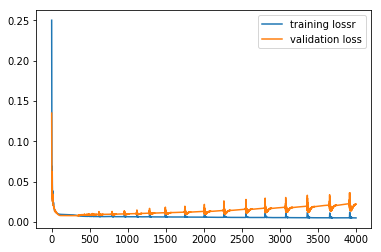

In [12]:
pyplot.plot(history_train.history['loss'], label='training lossr')
pyplot.plot(history_train.history['val_loss'], label='validation loss')
pyplot.legend()
pyplot.show()

In [13]:
history = model.fit(X, y, epochs=1500, batch_size=256, verbose=2, shuffle=False)

Epoch 1/1500
 - 0s - loss: 0.0119
Epoch 2/1500
 - 0s - loss: 0.0109
Epoch 3/1500
 - 0s - loss: 0.0101
Epoch 4/1500
 - 0s - loss: 0.0100
Epoch 5/1500
 - 0s - loss: 0.0098
Epoch 6/1500
 - 0s - loss: 0.0096
Epoch 7/1500
 - 0s - loss: 0.0095
Epoch 8/1500
 - 0s - loss: 0.0092
Epoch 9/1500
 - 0s - loss: 0.0091
Epoch 10/1500
 - 0s - loss: 0.0089
Epoch 11/1500
 - 0s - loss: 0.0086
Epoch 12/1500
 - 0s - loss: 0.0083
Epoch 13/1500
 - 0s - loss: 0.0081
Epoch 14/1500
 - 0s - loss: 0.0080
Epoch 15/1500
 - 0s - loss: 0.0081
Epoch 16/1500
 - 0s - loss: 0.0080
Epoch 17/1500
 - 0s - loss: 0.0080
Epoch 18/1500
 - 0s - loss: 0.0079
Epoch 19/1500
 - 0s - loss: 0.0078
Epoch 20/1500
 - 0s - loss: 0.0078
Epoch 21/1500
 - 0s - loss: 0.0077
Epoch 22/1500
 - 0s - loss: 0.0077
Epoch 23/1500
 - 0s - loss: 0.0077
Epoch 24/1500
 - 0s - loss: 0.0076
Epoch 25/1500
 - 0s - loss: 0.0076
Epoch 26/1500
 - 0s - loss: 0.0076
Epoch 27/1500
 - 0s - loss: 0.0076
Epoch 28/1500
 - 0s - loss: 0.0076
Epoch 29/1500
 - 0s - loss: 0

Epoch 232/1500
 - 0s - loss: 0.0070
Epoch 233/1500
 - 0s - loss: 0.0070
Epoch 234/1500
 - 0s - loss: 0.0070
Epoch 235/1500
 - 0s - loss: 0.0070
Epoch 236/1500
 - 0s - loss: 0.0070
Epoch 237/1500
 - 0s - loss: 0.0070
Epoch 238/1500
 - 0s - loss: 0.0070
Epoch 239/1500
 - 0s - loss: 0.0070
Epoch 240/1500
 - 0s - loss: 0.0070
Epoch 241/1500
 - 0s - loss: 0.0070
Epoch 242/1500
 - 0s - loss: 0.0070
Epoch 243/1500
 - 0s - loss: 0.0070
Epoch 244/1500
 - 0s - loss: 0.0070
Epoch 245/1500
 - 0s - loss: 0.0070
Epoch 246/1500
 - 0s - loss: 0.0070
Epoch 247/1500
 - 0s - loss: 0.0070
Epoch 248/1500
 - 0s - loss: 0.0070
Epoch 249/1500
 - 0s - loss: 0.0070
Epoch 250/1500
 - 0s - loss: 0.0070
Epoch 251/1500
 - 0s - loss: 0.0070
Epoch 252/1500
 - 0s - loss: 0.0070
Epoch 253/1500
 - 0s - loss: 0.0070
Epoch 254/1500
 - 0s - loss: 0.0070
Epoch 255/1500
 - 0s - loss: 0.0070
Epoch 256/1500
 - 0s - loss: 0.0070
Epoch 257/1500
 - 0s - loss: 0.0070
Epoch 258/1500
 - 0s - loss: 0.0070
Epoch 259/1500
 - 0s - loss:

Epoch 460/1500
 - 0s - loss: 0.0069
Epoch 461/1500
 - 0s - loss: 0.0069
Epoch 462/1500
 - 0s - loss: 0.0069
Epoch 463/1500
 - 0s - loss: 0.0069
Epoch 464/1500
 - 0s - loss: 0.0069
Epoch 465/1500
 - 0s - loss: 0.0069
Epoch 466/1500
 - 0s - loss: 0.0069
Epoch 467/1500
 - 0s - loss: 0.0069
Epoch 468/1500
 - 0s - loss: 0.0069
Epoch 469/1500
 - 0s - loss: 0.0069
Epoch 470/1500
 - 0s - loss: 0.0069
Epoch 471/1500
 - 0s - loss: 0.0069
Epoch 472/1500
 - 0s - loss: 0.0069
Epoch 473/1500
 - 0s - loss: 0.0069
Epoch 474/1500
 - 0s - loss: 0.0068
Epoch 475/1500
 - 0s - loss: 0.0069
Epoch 476/1500
 - 0s - loss: 0.0069
Epoch 477/1500
 - 0s - loss: 0.0068
Epoch 478/1500
 - 0s - loss: 0.0069
Epoch 479/1500
 - 0s - loss: 0.0068
Epoch 480/1500
 - 0s - loss: 0.0068
Epoch 481/1500
 - 0s - loss: 0.0068
Epoch 482/1500
 - 0s - loss: 0.0068
Epoch 483/1500
 - 0s - loss: 0.0068
Epoch 484/1500
 - 0s - loss: 0.0068
Epoch 485/1500
 - 0s - loss: 0.0068
Epoch 486/1500
 - 0s - loss: 0.0068
Epoch 487/1500
 - 0s - loss:

Epoch 688/1500
 - 0s - loss: 0.0068
Epoch 689/1500
 - 0s - loss: 0.0067
Epoch 690/1500
 - 0s - loss: 0.0067
Epoch 691/1500
 - 0s - loss: 0.0067
Epoch 692/1500
 - 0s - loss: 0.0067
Epoch 693/1500
 - 0s - loss: 0.0067
Epoch 694/1500
 - 0s - loss: 0.0067
Epoch 695/1500
 - 0s - loss: 0.0067
Epoch 696/1500
 - 0s - loss: 0.0067
Epoch 697/1500
 - 0s - loss: 0.0067
Epoch 698/1500
 - 0s - loss: 0.0067
Epoch 699/1500
 - 0s - loss: 0.0067
Epoch 700/1500
 - 0s - loss: 0.0067
Epoch 701/1500
 - 0s - loss: 0.0067
Epoch 702/1500
 - 0s - loss: 0.0067
Epoch 703/1500
 - 0s - loss: 0.0067
Epoch 704/1500
 - 0s - loss: 0.0067
Epoch 705/1500
 - 0s - loss: 0.0067
Epoch 706/1500
 - 0s - loss: 0.0067
Epoch 707/1500
 - 0s - loss: 0.0067
Epoch 708/1500
 - 0s - loss: 0.0067
Epoch 709/1500
 - 0s - loss: 0.0067
Epoch 710/1500
 - 0s - loss: 0.0067
Epoch 711/1500
 - 0s - loss: 0.0067
Epoch 712/1500
 - 0s - loss: 0.0067
Epoch 713/1500
 - 0s - loss: 0.0067
Epoch 714/1500
 - 0s - loss: 0.0067
Epoch 715/1500
 - 0s - loss:

Epoch 916/1500
 - 0s - loss: 0.0067
Epoch 917/1500
 - 0s - loss: 0.0067
Epoch 918/1500
 - 0s - loss: 0.0067
Epoch 919/1500
 - 0s - loss: 0.0067
Epoch 920/1500
 - 0s - loss: 0.0067
Epoch 921/1500
 - 0s - loss: 0.0067
Epoch 922/1500
 - 0s - loss: 0.0067
Epoch 923/1500
 - 0s - loss: 0.0067
Epoch 924/1500
 - 0s - loss: 0.0067
Epoch 925/1500
 - 0s - loss: 0.0067
Epoch 926/1500
 - 0s - loss: 0.0067
Epoch 927/1500
 - 0s - loss: 0.0067
Epoch 928/1500
 - 0s - loss: 0.0067
Epoch 929/1500
 - 0s - loss: 0.0067
Epoch 930/1500
 - 0s - loss: 0.0067
Epoch 931/1500
 - 0s - loss: 0.0067
Epoch 932/1500
 - 0s - loss: 0.0067
Epoch 933/1500
 - 0s - loss: 0.0067
Epoch 934/1500
 - 0s - loss: 0.0067
Epoch 935/1500
 - 0s - loss: 0.0067
Epoch 936/1500
 - 0s - loss: 0.0067
Epoch 937/1500
 - 0s - loss: 0.0067
Epoch 938/1500
 - 0s - loss: 0.0067
Epoch 939/1500
 - 0s - loss: 0.0067
Epoch 940/1500
 - 0s - loss: 0.0067
Epoch 941/1500
 - 0s - loss: 0.0067
Epoch 942/1500
 - 0s - loss: 0.0067
Epoch 943/1500
 - 0s - loss:

Epoch 1140/1500
 - 0s - loss: 0.0067
Epoch 1141/1500
 - 0s - loss: 0.0067
Epoch 1142/1500
 - 0s - loss: 0.0067
Epoch 1143/1500
 - 0s - loss: 0.0067
Epoch 1144/1500
 - 0s - loss: 0.0067
Epoch 1145/1500
 - 0s - loss: 0.0067
Epoch 1146/1500
 - 0s - loss: 0.0067
Epoch 1147/1500
 - 0s - loss: 0.0067
Epoch 1148/1500
 - 0s - loss: 0.0067
Epoch 1149/1500
 - 0s - loss: 0.0067
Epoch 1150/1500
 - 0s - loss: 0.0067
Epoch 1151/1500
 - 0s - loss: 0.0067
Epoch 1152/1500
 - 0s - loss: 0.0067
Epoch 1153/1500
 - 0s - loss: 0.0067
Epoch 1154/1500
 - 0s - loss: 0.0067
Epoch 1155/1500
 - 0s - loss: 0.0067
Epoch 1156/1500
 - 0s - loss: 0.0067
Epoch 1157/1500
 - 0s - loss: 0.0067
Epoch 1158/1500
 - 0s - loss: 0.0067
Epoch 1159/1500
 - 0s - loss: 0.0066
Epoch 1160/1500
 - 0s - loss: 0.0066
Epoch 1161/1500
 - 0s - loss: 0.0066
Epoch 1162/1500
 - 0s - loss: 0.0066
Epoch 1163/1500
 - 0s - loss: 0.0066
Epoch 1164/1500
 - 0s - loss: 0.0066
Epoch 1165/1500
 - 0s - loss: 0.0066
Epoch 1166/1500
 - 0s - loss: 0.0066
E

Epoch 1362/1500
 - 0s - loss: 0.0065
Epoch 1363/1500
 - 0s - loss: 0.0065
Epoch 1364/1500
 - 0s - loss: 0.0065
Epoch 1365/1500
 - 0s - loss: 0.0065
Epoch 1366/1500
 - 0s - loss: 0.0065
Epoch 1367/1500
 - 0s - loss: 0.0065
Epoch 1368/1500
 - 0s - loss: 0.0065
Epoch 1369/1500
 - 0s - loss: 0.0065
Epoch 1370/1500
 - 0s - loss: 0.0065
Epoch 1371/1500
 - 0s - loss: 0.0065
Epoch 1372/1500
 - 0s - loss: 0.0065
Epoch 1373/1500
 - 0s - loss: 0.0065
Epoch 1374/1500
 - 0s - loss: 0.0065
Epoch 1375/1500
 - 0s - loss: 0.0065
Epoch 1376/1500
 - 0s - loss: 0.0065
Epoch 1377/1500
 - 0s - loss: 0.0065
Epoch 1378/1500
 - 0s - loss: 0.0065
Epoch 1379/1500
 - 0s - loss: 0.0065
Epoch 1380/1500
 - 0s - loss: 0.0065
Epoch 1381/1500
 - 0s - loss: 0.0065
Epoch 1382/1500
 - 0s - loss: 0.0065
Epoch 1383/1500
 - 0s - loss: 0.0065
Epoch 1384/1500
 - 0s - loss: 0.0065
Epoch 1385/1500
 - 0s - loss: 0.0065
Epoch 1386/1500
 - 0s - loss: 0.0065
Epoch 1387/1500
 - 0s - loss: 0.0065
Epoch 1388/1500
 - 0s - loss: 0.0065
E

In [14]:
# make a prediction
yhat = model.predict(X)
pre_all=concatenate((yhat,values[:,1:]),axis=1)
pre_all_inv= scaler.inverse_transform(pre_all)

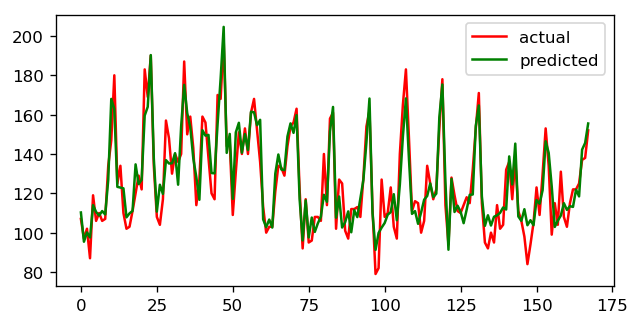

In [15]:
pyplot.figure(figsize=(6,3),dpi=120)
pyplot.plot(values[:,0], label='actual',color='r')
pyplot.plot(pre_all_inv[:,0], label='predicted',color='g')
pyplot.legend()
pyplot.show()

In [16]:
rmse = sqrt(mean_squared_error(pre_all_inv[:,0],values[:,0]))#平方和再除以n，再开根号
rmse

9.680394871121727